In [1]:
#Loading all required libraries 
# %pylab inline
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import xml.etree.ElementTree as ET

from PIL import Image, ImageEnhance

In [2]:
#Setting matplot figure size
plt.rcParams['figure.figsize'] = [15, 8]
fileName = 'Table_data/public test/49436'

In [3]:
# Tăng độ tương phản, làm rõ ảnh
def preprocess(image, factor: int):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = Image.fromarray(image)
    enhancer = ImageEnhance.Sharpness(img).enhance(factor)
    if image.std() < 30:
        enhancer = ImageEnhance.Contrast(enhancer).enhance(factor)
    return np.array(enhancer)

In [4]:
# loading image form directory
img = cv2.imread(fileName + '.png',0)
img = preprocess(img, 100)

In [5]:
img.shape

(313, 614)

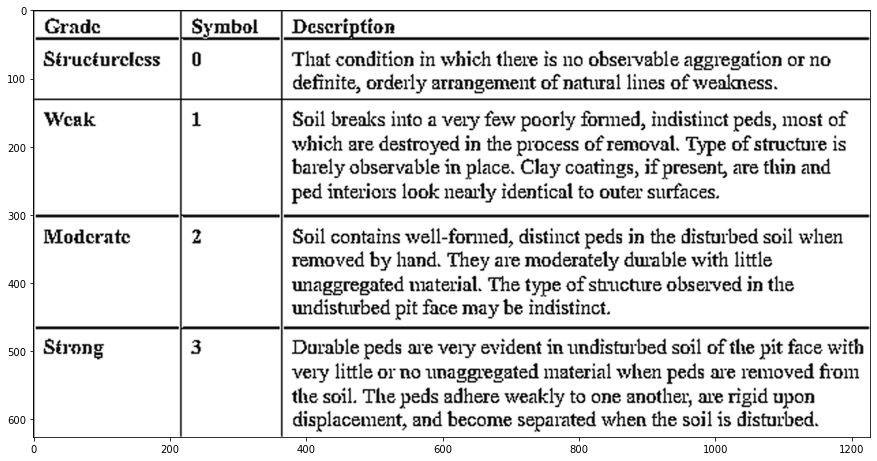

In [6]:
# showing image
imgplot = plt.imshow(cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [7]:
# for adding border to an image
img1= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255])

In [8]:
img123 = img1.copy()

In [9]:
# Thresholding the image
(thresh, th3) = cv2.threshold(img1, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

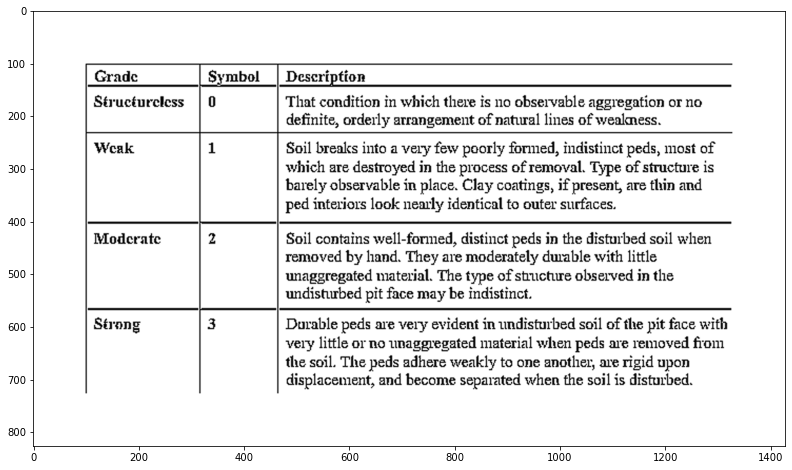

In [10]:
imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [11]:
# to flip image pixel values
th3 = 255-th3

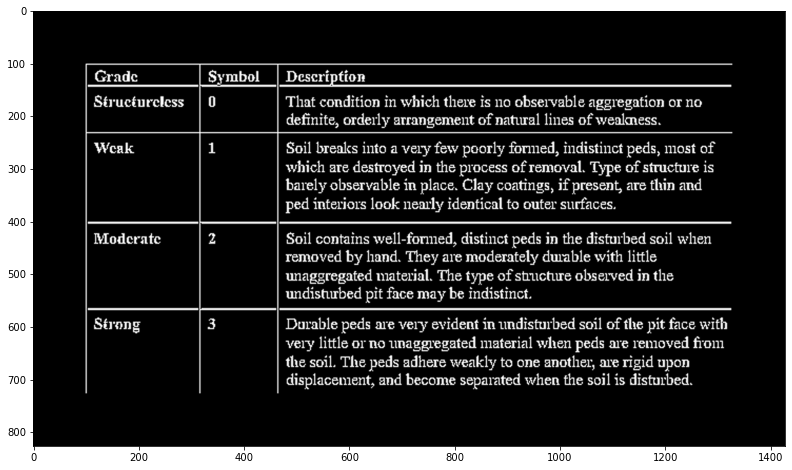

In [12]:
imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [13]:
# initialize kernels for table boundaries detections
if(th3.shape[0]<1000):
    ver = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 7))
    hor = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 1))
else:
    ver = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 19))
    hor = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 1))

In [14]:
# to detect vertical lines of table borders
img_temp1 = cv2.erode(th3, ver, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, ver, iterations=3)

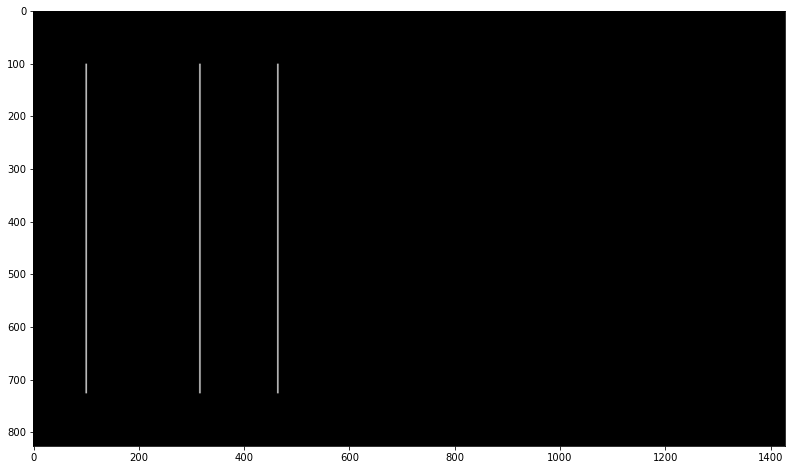

In [15]:
imgplot = plt.imshow(cv2.resize(verticle_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [16]:
# to detect horizontal lines of table borders
img_hor = cv2.erode(th3, hor, iterations=3)
hor_lines_img = cv2.dilate(img_hor, hor, iterations=4)

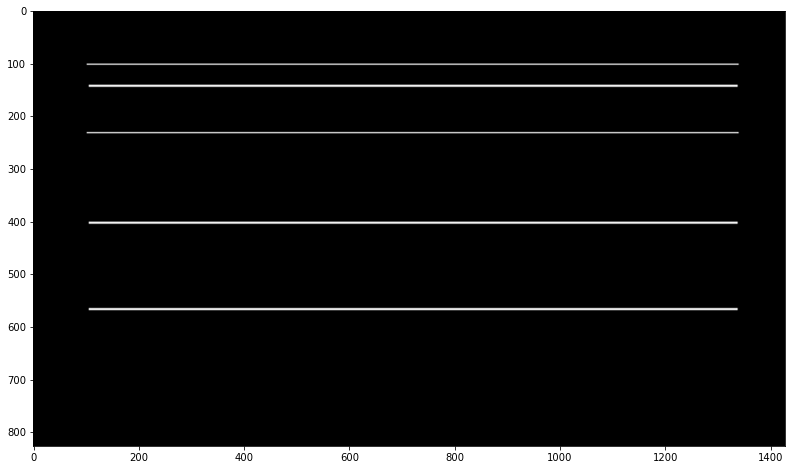

In [17]:
imgplot = plt.imshow(cv2.resize(hor_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [18]:
# adding horizontal and vertical lines
hor_ver = cv2.add(hor_lines_img,verticle_lines_img)

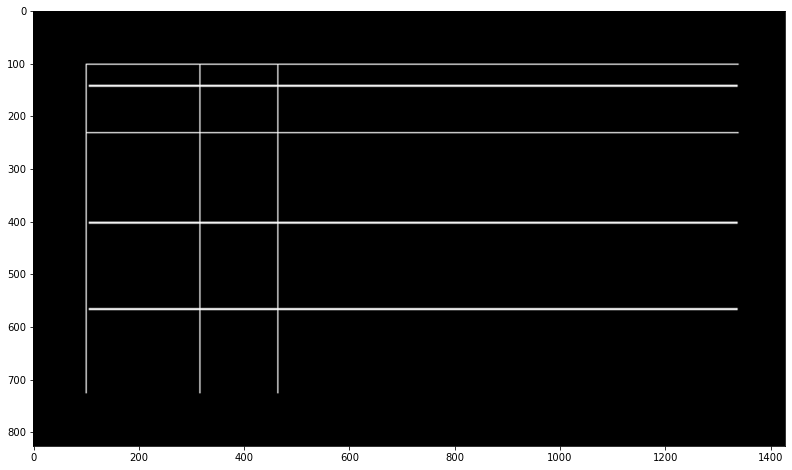

In [19]:
imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [20]:
hor_ver = 255-hor_ver

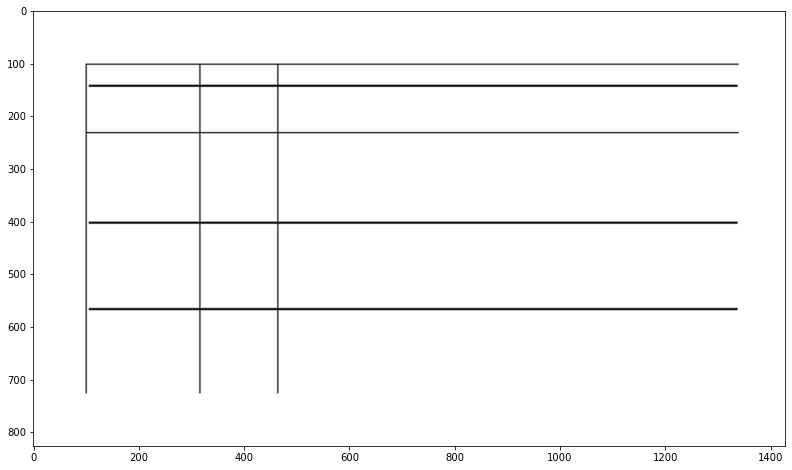

In [21]:
imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [22]:
# subtracting table borders from image
temp = cv2.subtract(th3,hor_ver)

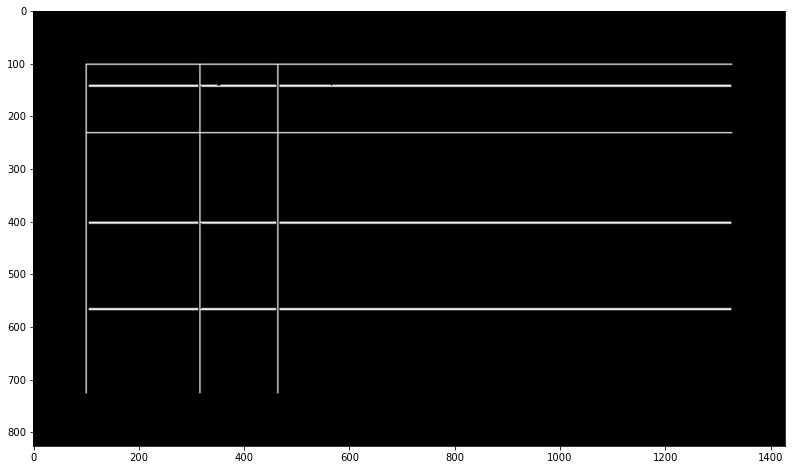

In [23]:
imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [24]:
temp = 255-temp

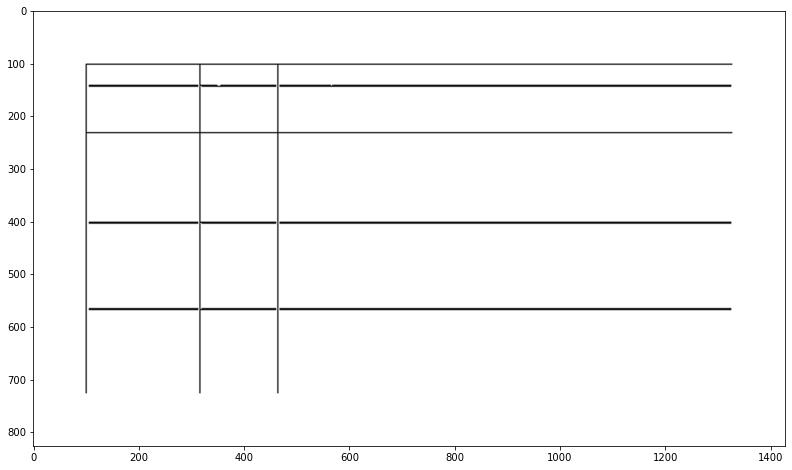

In [25]:
imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [26]:
#Doing xor operation for erasing table boundaries
tt = cv2.bitwise_xor(img1,temp)

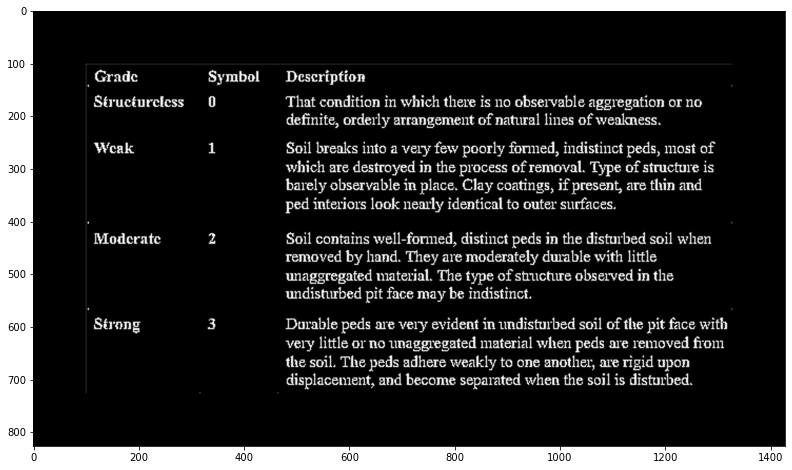

In [27]:
imgplot = plt.imshow(cv2.resize(tt, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [28]:
iii = cv2.bitwise_not(tt)

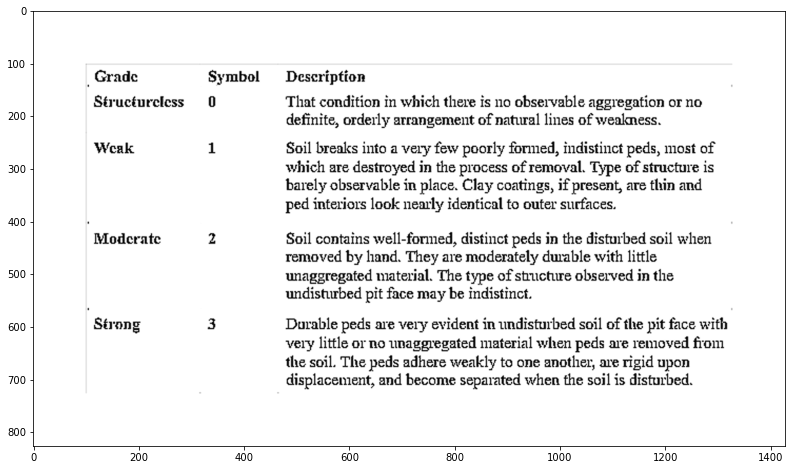

In [29]:
imgplot = plt.imshow(cv2.resize(iii, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [30]:
tt1=iii.copy()

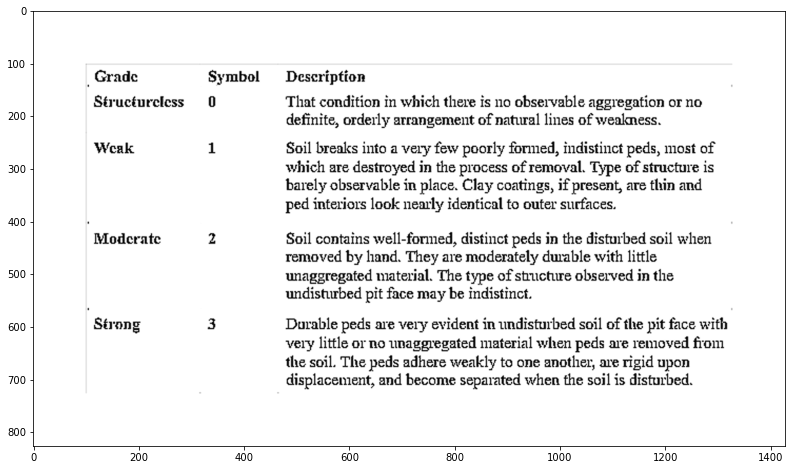

In [31]:
imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [32]:
#kernel initialization

ver1 = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 9))
hor1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 2))

In [33]:
#morphological operation
temp1 = cv2.erode(tt1, ver1, iterations=1)
verticle_lines_img1 = cv2.dilate(temp1, ver1, iterations=1)

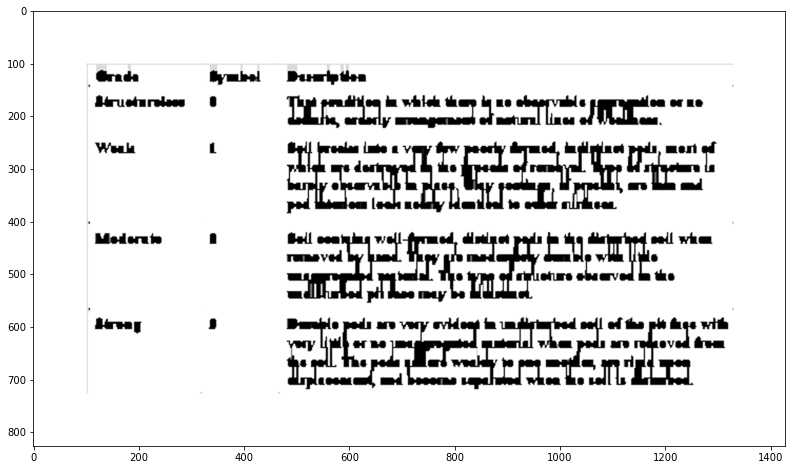

In [34]:
imgplot = plt.imshow(cv2.resize(verticle_lines_img1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [35]:
temp12 = cv2.erode(tt1, hor1, iterations=1)
hor_lines_img2 = cv2.dilate(temp12, hor1, iterations=1)

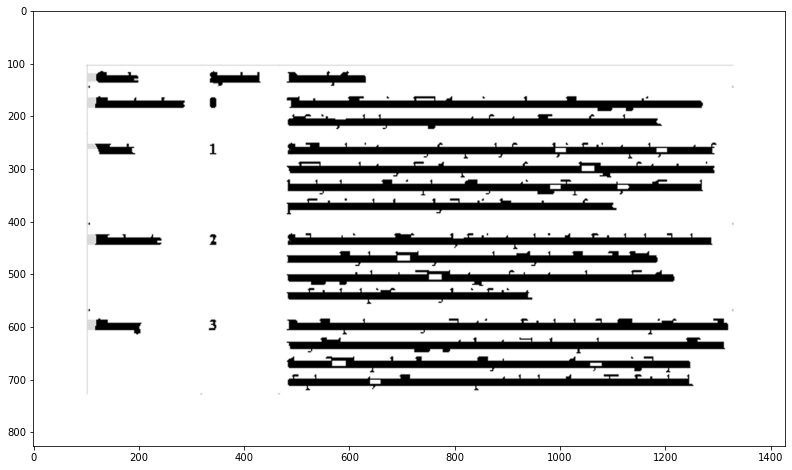

In [36]:
imgplot = plt.imshow(cv2.resize(hor_lines_img2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [37]:
# doing or operation for detecting only text part and removing rest all
hor_ver = cv2.add(hor_lines_img2,verticle_lines_img1)

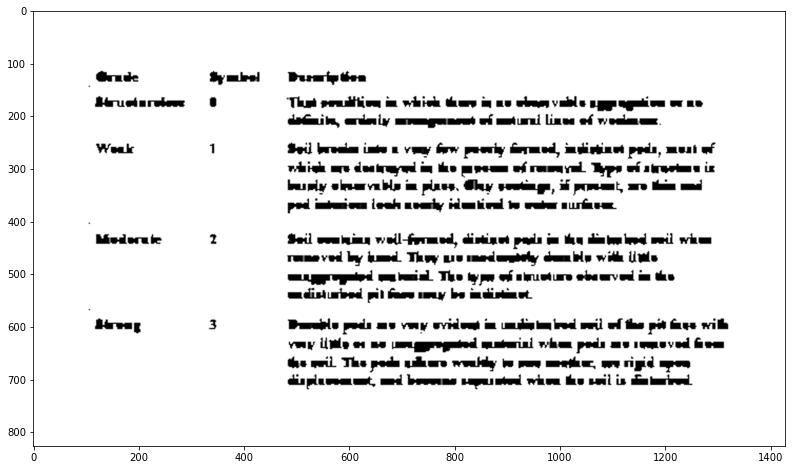

In [38]:
imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [39]:
dim1 = (hor_ver.shape[1],hor_ver.shape[0])

In [40]:
dim = (hor_ver.shape[1]*2,hor_ver.shape[0]*2)

In [41]:
# resizing image to its double size to increase the text size
resized = cv2.resize(hor_ver, dim, interpolation = cv2.INTER_AREA)

In [42]:
#bitwise not operation for fliping the pixel values so as to apply morphological operation such as dilation and erode
want = cv2.bitwise_not(resized)

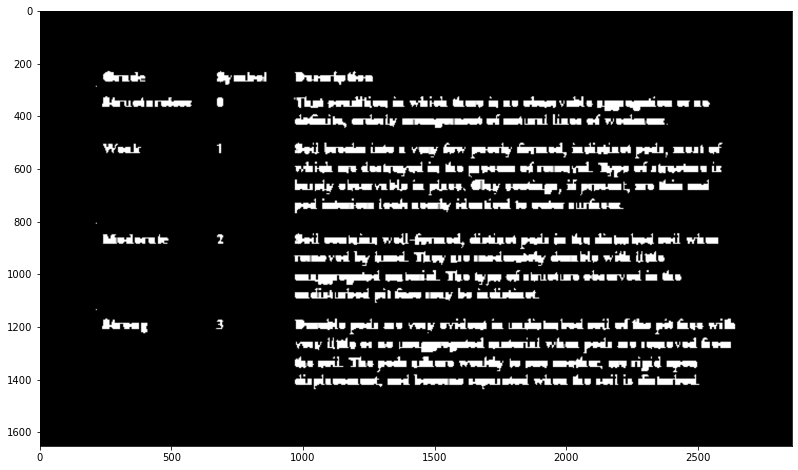

In [43]:
imgplot = plt.imshow(cv2.resize(want, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [44]:
if(want.shape[0]<1000):
    kernel1 = np.array([[1,1,1]])
    kernel2 = np.array([[1,1],
                        [1,1]])
    kernel3 = np.array([[1,0,1],[0,1,0],
                       [1,0,1]])
else:
    kernel1 = np.array([[1,1,1,1,1,1]])
    kernel2 = np.array([[1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1]])


In [45]:
tt1 = cv2.dilate(want,kernel1,iterations=7)

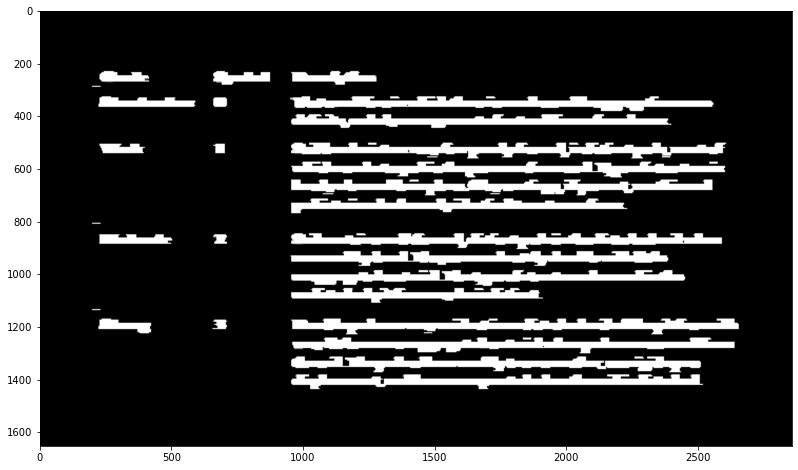

In [46]:
imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [47]:
# getting image back to its original size
resized1 = cv2.resize(tt1, dim1, interpolation = cv2.INTER_AREA)

In [48]:
# Find contours for image, which will detect all the boxes
contours1, hierarchy1 = cv2.findContours(resized1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [49]:
#function to sort contours by its x-axis (top to bottom)
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [50]:
#sorting contours by calling fuction
(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")

In [51]:
#storing value of all bouding box height
heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])

In [52]:
#sorting height values
heightlist.sort()

In [53]:
sportion = int(.5*len(heightlist))

In [54]:
eportion = int(0.05*len(heightlist))

In [55]:
#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])

In [56]:
# keeping bounding box which are having height more then 70% of the mean height and deleting all those value where 
# ratio of width to height is less then 0.9
box =[]
rectsUsed = []
imag = iii.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.7*medianheight and w/h > 0.9):
        image = cv2.rectangle(imag,(x,y),(x+w,y+h),(0,255,0),1)
        box.append([x-50,y-50,x+w-50,y+h-50])
        rectsUsed.append(False)
    # to show image


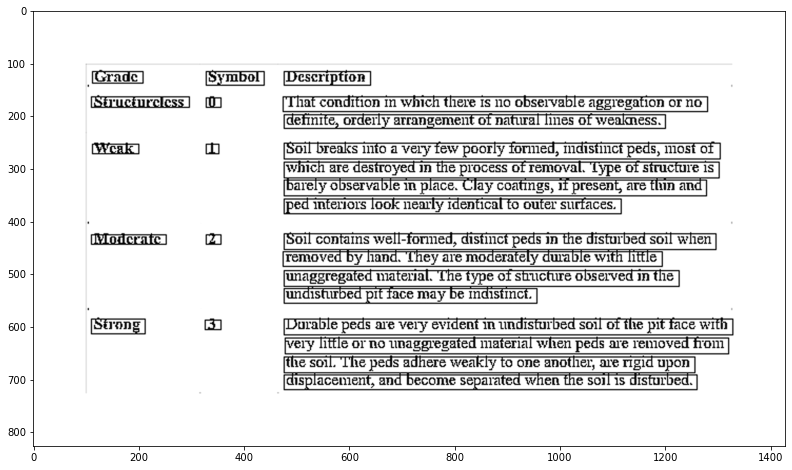

In [57]:
imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [58]:
cv2.imwrite('imagegen.jpg',image)

True

In [59]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [60]:
def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)

    return filename, list_with_all_boxes

name, boxes = read_content(fileName + ".xml")

In [61]:
print(len(boxes))

15


In [62]:
print(box)

[[188, 7, 270, 20], [114, 7, 169, 20], [6, 7, 54, 18], [187, 31, 590, 45], [5, 31, 98, 41], [114, 32, 128, 41], [188, 48, 550, 61], [188, 75, 602, 90], [114, 76, 126, 85], [6, 76, 50, 85], [188, 93, 601, 108], [188, 110, 589, 125], [188, 128, 508, 142], [188, 161, 598, 176], [114, 162, 128, 171], [5, 162, 76, 171], [187, 178, 547, 192], [188, 196, 563, 211], [188, 213, 428, 227], [188, 242, 614, 257], [5, 242, 56, 256], [113, 243, 128, 252], [189, 260, 610, 275], [188, 278, 578, 293], [188, 295, 580, 309]]


In [63]:
hightIOU = []
for testBox in boxes:
    _testBox = {'x1' : testBox[0], 'x2': testBox[2], 'y1' : testBox[1], 'y2': testBox[3]}
    minIou = 0
    for iBox in box:
        _iBox = {'x1' : iBox[0], 'x2': iBox[2], 'y1' : iBox[1], 'y2': iBox[3]}
        iou = get_iou(_iBox, _testBox)
        minIou = max(minIou, iou)
    if minIou >= 0.5:
        hightIOU.append([iBox, minIou])
#     print(minIou)
Map = 1.0 * len(hightIOU) / len(boxes)
print(Map)

0.4666666666666667


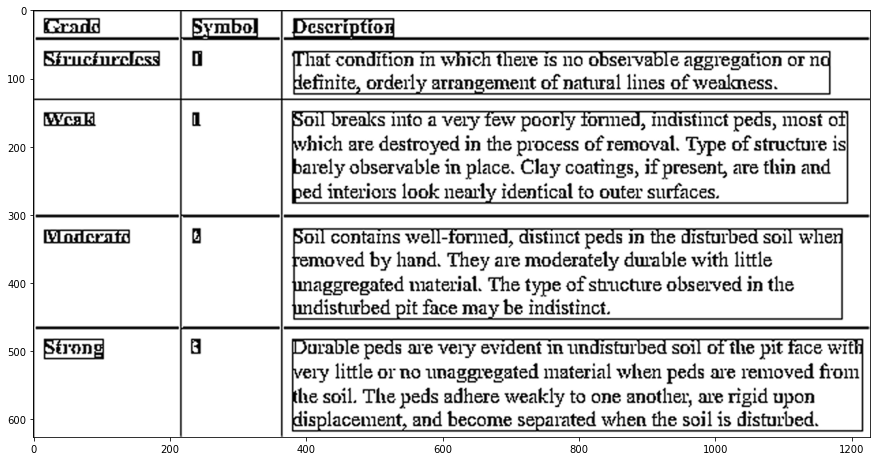

In [64]:
testResultImg = img.copy()
for testBox in boxes:
    _testResultImg = cv2.rectangle(testResultImg,(testBox[0],testBox[1]),(testBox[2],testBox[3]),(0,255,0),1)
imgplot = plt.imshow(cv2.resize(_testResultImg, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

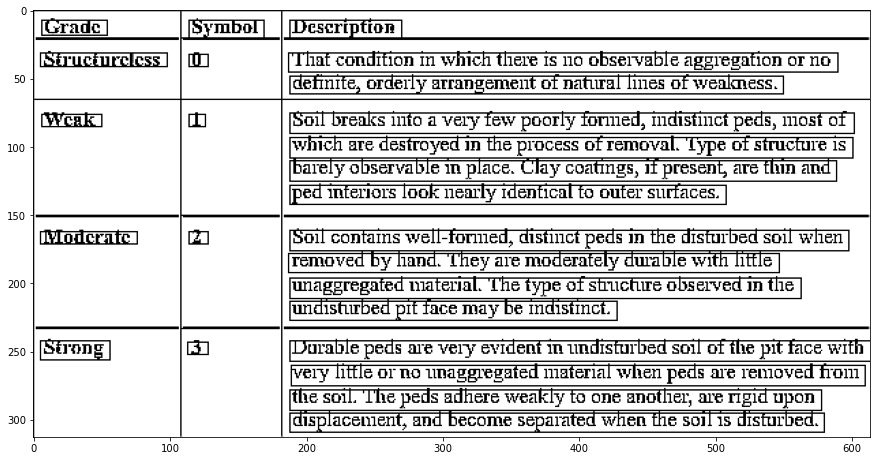

In [65]:
myResultImg = img.copy()
for iBox in box:
    _myResultImg = cv2.rectangle(myResultImg,(iBox[0],iBox[1]),(iBox[2],iBox[3]),(0,255,0),1)
imgplot = plt.imshow(cv2.resize(_myResultImg, None, fx=1, fy=1, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

[[188, 7, 270, 20], [114, 7, 169, 20], [6, 7, 54, 18], [187, 31, 590, 61], [5, 31, 98, 41], [114, 32, 128, 41], [188, 75, 602, 142], [114, 76, 126, 85], [6, 76, 50, 85], [187, 161, 598, 227], [114, 162, 128, 171], [5, 162, 76, 171], [188, 242, 614, 309], [5, 242, 56, 256], [113, 243, 128, 252]]


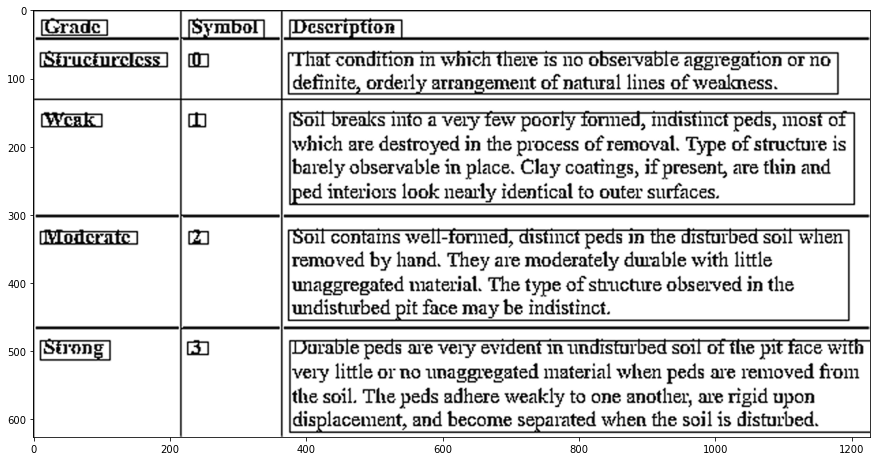

In [66]:
def getYFromBox(item):
    return item[1]
def reBox(currentBoxes):
    currentBoxes.sort(key = getYFromBox)
    # Array of accepted rects
    acceptedRects = []
    # Merge threshold for y coordinate distance
    yThr = 5

    # Iterate all initial bounding rects
    for supIdx, supVal in enumerate(currentBoxes):
        if (rectsUsed[supIdx] == False):

            # Initialize current rect
            currxMin = supVal[0]
            currxMax = supVal[2]
            curryMin = supVal[1]
            curryMax = supVal[3]

            # This bounding rect is used
            rectsUsed[supIdx] = True

            # Iterate all initial bounding rects
            # starting from the next
            for subIdx, subVal in enumerate(currentBoxes[(supIdx+1):], start = (supIdx+1)):

                # Initialize merge candidate
                candxMin = subVal[0]
                candxMax = subVal[2]
                candyMin = subVal[1]
                candyMax = subVal[3]

                # Check if x distance between current rect
                # and merge candidate is small enough
                if (candyMin <= curryMax + yThr and currxMax > candxMin and currxMin < candxMax):

                    # Reset coordinates of current rect
                    curryMax = candyMax
                    currxMin = min(currxMin, candxMin)
                    currxMax = max(currxMax, candxMax)

                    # Merge candidate (bounding rect) is used
                    rectsUsed[subIdx] = True
#                 else:
#                     break

            # No more merge candidates possible, accept current rect
            acceptedRects.append([currxMin, curryMin, currxMax, curryMax])
    return acceptedRects
while(True):
    newBox = reBox(box)
    if len(newBox) == len(box):
        break
    else:
        box = newBox
        for supIdx, supVal in enumerate(box):
            rectsUsed[supIdx] =  False
print(box)
finalResultImg = img.copy()

for rect in box:
    finalResultImg = cv2.rectangle(finalResultImg, (rect[0], rect[1]), (rect[2], rect[3]), (0, 255, 0), 1)
imgplot = plt.imshow(cv2.resize(finalResultImg, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()